### Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import glob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
tqdm.pandas()

/Users/chengxianzhang/anaconda3/envs/huggingface/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [37]:
pd.set_option('display.max_colwidth', None)

In [31]:
analyzer = SentimentIntensityAnalyzer()


In [ ]:
for filepath in tqdm(glob.glob('../data/tweets_en/*')):
    df = pd.read_csv(filepath, dtype = {'text':'str'} ,lineterminator='\n', encoding='latin-1')
    df = df.dropna(subset='text')
    compound = []
    for s in df['text'].apply(analyzer.polarity_scores):
        compound.append(s['compound'])
    df['compound'] = compound
    df.to_csv(filepath, index = False)

Average sentiment score
ukrain: -0.04
russia: -0.08
putin: -0.08
zelenskyy: 0.028
eu: -0.04
nato: -0.10
biden: -0.02
johnson: -0.04
macron: -0.02
scholz: -0.12

In [32]:
df = pd.read_csv('../data/tweets_en/tweets_russia_en.csv', dtype={'text':'str'}, lineterminator='\n', encoding='latin-1')

In [33]:
np.mean(df['compound'])

-0.0867171999053751

<AxesSubplot:>

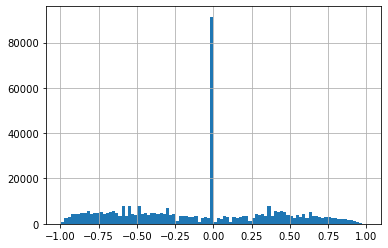

In [34]:
df['compound'].hist(bins='fd')

In [ ]:
df[df['compound']<= -0.8][:10]['text']

In [ ]:
df[df['compound']<= -0.5][:10]['text']